In [4]:
# European Cities Temperature Clustering with the T-SNE algorithm

In [6]:
## Dataset: Average Monthly Temperatures for Several Cities around Europe
### Sourced: http://factominer.free.fr/course/MOOC.html

In [7]:
### Motivation: The above resource by F. Husson shows that using simple PCA 
### analysis will discrimate cities by average temperature PC1 and by 
### amplitude (hottest temp- coldest temp) PC2 (which is obvious when
### you think about it).  
### A more sophisticated algorithm may  a) find less obvious patterns and b)
### better disciminate amplitude so as to help with clustering.  

In [ ]:
## Required output: 
## - Cluster number for each city
## - Line chart visualizations each city in facet chart.

In [92]:
# Imports
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [4]:
# Read in Data

df = pd.read_csv ( 'http://factominer.free.fr/course/donnees/data_clustering_Temperature.csv', sep=';')
df.head ()

,Unnamed: 0,January,February,March,April,May,June,July,August,September,October,November,December,Annual,Amplitude,Latitude,Longitude,Area
0,Amsterdam,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4,9.9,14.6,52.2,4.5,West
1,Athens,9.1,9.7,11.7,15.4,20.1,24.5,27.4,27.2,23.8,19.2,14.6,11.0,17.8,18.3,37.6,23.5,South
2,Berlin,-0.2,0.1,4.4,8.2,13.8,16.0,18.3,18.0,14.4,10.0,4.2,1.2,9.1,18.5,52.3,13.2,West
3,Brussels,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,11.1,6.7,4.4,10.3,14.4,50.5,4.2,West
4,Budapest,-1.1,0.8,5.5,11.6,17.0,20.2,22.0,21.3,16.9,11.3,5.1,0.7,10.9,23.1,47.3,19.0,East


In [71]:
# Obtain some data to process..
df.columns = np.insert ( df.columns[1:], 0,'Country' ,axis=0)
df_train = df.drop(df.columns[[13,14,15,16,17]], axis=1, inplace=False)
df_train.head ()

,Country,January,February,March,April,May,June,July,August,September,October,November,December
0,Amsterdam,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4
1,Athens,9.1,9.7,11.7,15.4,20.1,24.5,27.4,27.2,23.8,19.2,14.6,11.0
2,Berlin,-0.2,0.1,4.4,8.2,13.8,16.0,18.3,18.0,14.4,10.0,4.2,1.2
3,Brussels,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,11.1,6.7,4.4
4,Budapest,-1.1,0.8,5.5,11.6,17.0,20.2,22.0,21.3,16.9,11.3,5.1,0.7


In [93]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, perplexity = 20).fit_transform( df_train.iloc [ : , 1:] )

#df_train

In [96]:
# Merge together
df_out = pd.concat ( [df, pd.DataFrame ( X_embedded, columns =['d1','d2'] )], axis=1 )
df_out.head()


,Country,January,February,March,April,May,June,July,August,September,October,November,December,Annual,Amplitude,Latitude,Longitude,Area,d1,d2
0,Amsterdam,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4,9.9,14.6,52.2,4.5,West,-75.316002,35.530293
1,Athens,9.1,9.7,11.7,15.4,20.1,24.5,27.4,27.2,23.8,19.2,14.6,11.0,17.8,18.3,37.6,23.5,South,-87.261658,-301.834564
2,Berlin,-0.2,0.1,4.4,8.2,13.8,16.0,18.3,18.0,14.4,10.0,4.2,1.2,9.1,18.5,52.3,13.2,West,-6.346800,13.042517
3,Brussels,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,11.1,6.7,4.4,10.3,14.4,50.5,4.2,West,-61.918827,-17.621460
4,Budapest,-1.1,0.8,5.5,11.6,17.0,20.2,22.0,21.3,16.9,11.3,5.1,0.7,10.9,23.1,47.3,19.0,East,90.066597,-64.500000


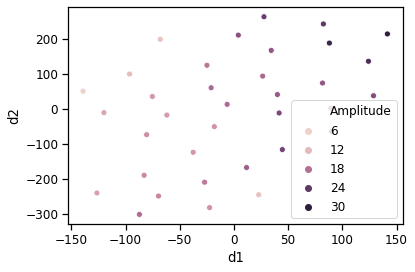

In [97]:
sns.set_context ('notebook', font_scale =1.1)
sns.set_style = ('ticks')
sns.scatterplot ( x = 'd1', y='d2', data = df_out, hue='Amplitude')


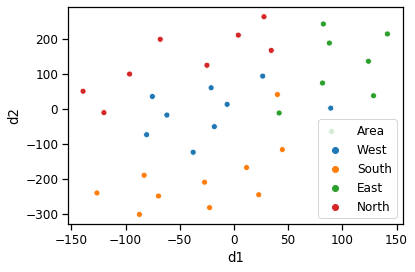

In [98]:
sns.set_context ('notebook', font_scale =1.1)
sns.set_style = ('ticks')
sns.scatterplot ( x = 'd1', y='d2', data = df_out, hue='Area')

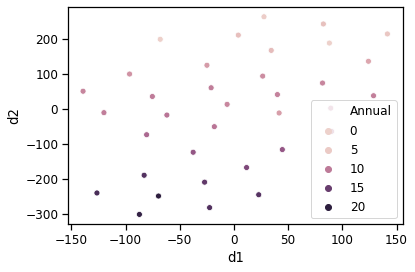

In [99]:
sns.set_context ('notebook', font_scale =1.1)
sns.set_style = ('ticks')
sns.scatterplot ( x = 'd1', y='d2', data = df_out, hue='Annual')

In [116]:
# Apply k means
import pandas as pd
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)

df_out['cluster'] =   kmeans.fit_predict(  df_out [['d1', 'd2']])  




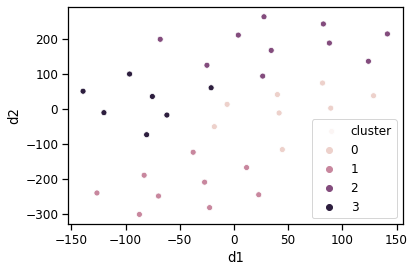

In [117]:
sns.set_context ('notebook', font_scale =1.1)
sns.set_style = ('ticks')
sns.scatterplot ( x = 'd1', y='d2', data = df_out, hue='cluster')

In [120]:
#pd.crosstab(df_out, ['cluster', 'Area'] )     

df_out.groupby(['cluster', 'Area'])['cluster'].count().unstack().fillna(0)

Area,East,North,South,West
cluster,,,,
0,4.0,0.0,2.0,3.0
1,0.0,0.0,8.0,1.0
2,4.0,5.0,0.0,1.0
3,0.0,3.0,0.0,4.0
